<a href="https://colab.research.google.com/github/JiratchayaPhinyodom/is_a_dolphin/blob/master/is_a_dolphin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [32]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U duckduckgo_search
    !pip install fastai
    !pip install fastbook

In [33]:
!pip install -U duckduckgo_search
!pip install fastai
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [47]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

In [59]:
urls = search_images('dolphin photos', max_images=1)
urls[0]

Searching for 'dolphin photos'


'https://www.australiangeographic.com.au/wp-content/uploads/2023/01/shutterstock_1373689742-scaled.jpg'

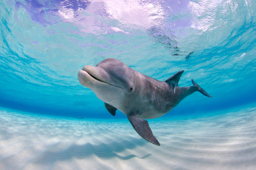

In [60]:
from fastdownload import download_url
dest = 'dolphin.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'ocean photos'


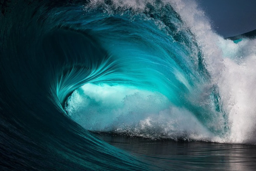

In [61]:
download_url(search_images('ocean photos', max_images=1)[0], 'ocean.jpg', show_progress=False)
Image.open('ocean.jpg').to_thumb(256,256)

Searching for 'shark photos'


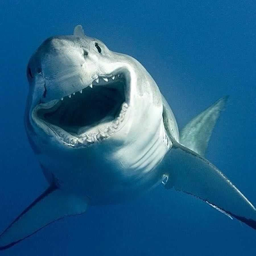

In [62]:
download_url(search_images('shark photos', max_images=1)[0], 'shark.jpg', show_progress=False)
Image.open('shark.jpg').to_thumb(256,256)

Searching for 'whale photos'


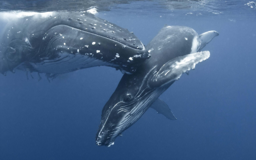

In [63]:
download_url(search_images('whale photos', max_images=1)[0], 'whale.jpg', show_progress=False)
Image.open('whale.jpg').to_thumb(256,256)

In [64]:
searches = 'ocean','dolphin','shark','whale'
path = Path('dolphin_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sea photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'ocean photo'
Searching for 'ocean sea photo'
Searching for 'ocean shade photo'
Searching for 'dolphin photo'
Searching for 'dolphin sea photo'
Searching for 'dolphin shade photo'
Searching for 'shark photo'
Searching for 'shark sea photo'
Searching for 'shark shade photo'
Searching for 'whale photo'
Searching for 'whale sea photo'
Searching for 'whale shade photo'


In [65]:
print(path)
searches = 'ocean','dolphin','shark','whale'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)


dolphin_or_not
ocean
7711fb84-104b-4604-ac5a-f1cdb04b9e77.jpg
1642a548-c660-4a03-95f8-2f3d95fda974.jpg
1007c53c-0c17-4292-bf3c-1f281b78ef4b.jpg
905d1fe7-5862-404b-9f96-efd021845860.jpg
a4c3b972-fec2-4d12-887e-30b17bed8147.jpg
48faf883-ce18-4f82-b6c8-9115f2838a25.jpeg
2483ead9-cff8-4df1-8576-c14be420c782.jpg
ccf973d4-12d3-49e6-9651-d01eaecd0ebf.jpg
373edb38-1f1e-49af-97d9-2870a2b3fa37.jpg
de00949a-f5ff-4e7f-8af9-e64895eac661.jpg
dc3aceb6-8544-4e79-ba7a-5dedb45eacc0.jpg
fe8a6815-fc7d-4e60-a248-888194ab352f.jpg
88ffb9b8-3241-4c1b-8a6c-68c8a23dcb96.jpeg
4fa590ab-fa28-4f55-a5f2-f207b8c68e2f.jpeg
cb5835f7-9186-4c79-b7c9-47e232bd6995.jpg
fb38358b-880e-4239-b08d-99f3b3dee41c.jpg
9ce75984-f094-46e4-9cab-699224c9c251.jpg
ddaa280e-1756-43b1-b3a1-1b8c6a97155c.jpg
0a1f2f1c-79f0-4b0c-87f9-5648ab6012ac.jpg
8aaca37a-3ff5-4028-9899-0ddb49db3652.jpg
a5977be6-a40d-411f-a171-65a3636cc493.jpeg
1a0e47e9-3fc4-4bd5-a1cb-ddef56094b9e.jpeg
55769cd9-ff6e-475d-84ab-7a9489bd4d04.jpg
b8478b7a-1dec-4a6e-94cc-6dde4fc

In [66]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

18

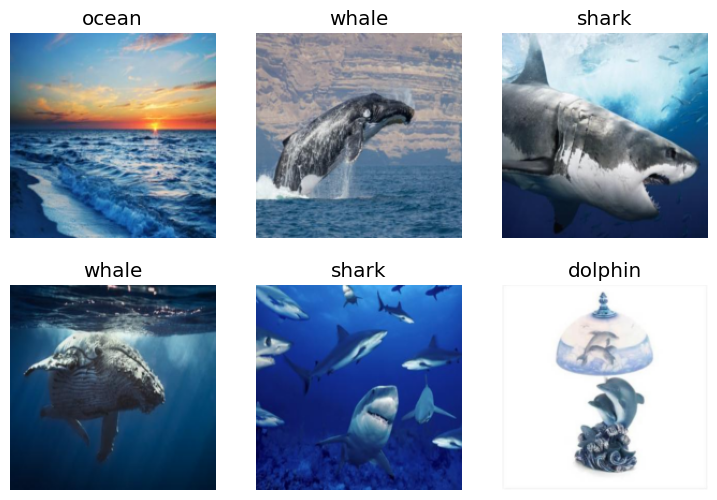

In [67]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [68]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.284120,0.276102,0.120000,02:15


epoch,train_loss,valid_loss,error_rate,time
0,0.278964,0.076031,0.028571,03:27
1,0.158827,0.037981,0.011429,03:01
2,0.101541,0.037679,0.017143,03:10


In [69]:
is_dolphin,_,probs = learn.predict(PILImage.create('dolphin.jpg'))
print(f"This is a: {is_dolphin}.")
print(f"Probability it's a dolphin: {probs[0]:.4f}")

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a: shark.
Probability it's a dolphin: 0.3928
